# Hunting Season

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

<br />

$$
\begin{align}
\frac{\partial P}{\partial t} = kP \cdot (1 - \frac{P}{N}) && P(0) = P_0
\end{align}
$$

<br />

In [2]:
years = 50

# deer
k = 0.4
N = 100_000
P_0 = N * 0.9

# hunters
harvest_per_year_mean = 10_000
harvest_per_year_stdev = 2_000

In [3]:
## define time domain
t = np.linspace(0, years, years)
dt = t[1] - t[0]

In [4]:
## define hunter's effect
deer_killed_per_year = np.random.normal(
    loc=harvest_per_year_mean, 
    scale=harvest_per_year_stdev,
    size=years
)

In [5]:
## define initial conditions
P = np.zeros(years)
P[0] = P_0

In [6]:
for n in range(0, years - 1):
        
    # derivatives for the humans
    dP = k * P[n] * (1 - (P[n] / N))
        
    ## calculate step forward
    P[n+1] = P[n] + (dP * dt)
    
    ## substract kill killed by hunters
    P[n+1] = P[n+1] - deer_killed_per_year[n]

In [7]:
df = pd.DataFrame({
    'population': P,
    'years': t
})

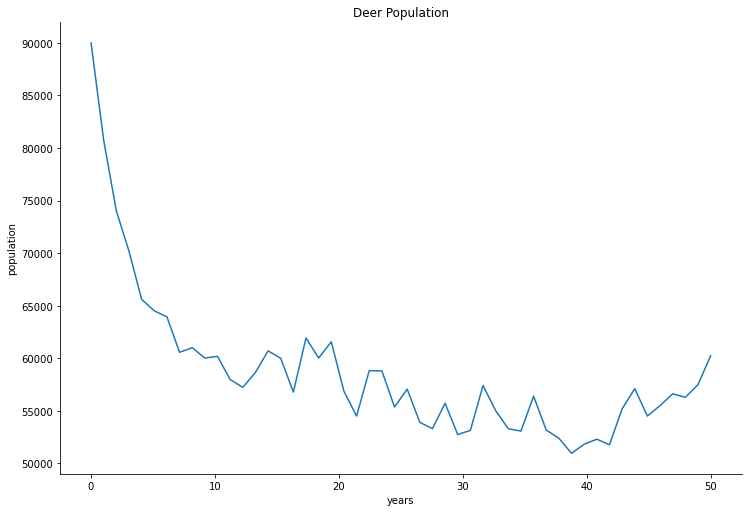

In [8]:
line = sns.relplot(
    data=df,
    x='years',
    y='population',
    kind='line',
    height=7,
    aspect=1.5
).set(
    title="Deer Population"
)

In [9]:
trials = 50

In [10]:
df = pd.DataFrame({'years': t})

for e in range(trials):
    ## define hunter's effect
    deer_killed_per_year = np.random.normal(
        loc=harvest_per_year_mean, 
        scale=harvest_per_year_stdev,
        size=years
    )
    
    ## define initial conditions
    P = np.zeros(years)
    P[0] = P_0
    
    for n in range(0, years - 1):
        
        # derivatives for the humans
        dP = k * P[n] * (1 - (P[n] / N))
        
        ## calculate step forward
        P[n+1] = P[n] + (dP * dt)
    
        ## substract kill killed by hunters
        P[n+1] = P[n+1] - deer_killed_per_year[n]
        
        
    df[e] = P
    

In [11]:
df.shape

(50, 51)

In [12]:
df = df.set_index('years')

In [13]:
df_melted = pd.melt(df.reset_index(), id_vars=['years'])

In [14]:
df_melted

,years,variable,value
0,0.000000,0,90000.000000
1,1.020408,0,80435.170586
2,2.040816,0,75947.336602
3,3.061224,0,73035.479661
4,4.081633,0,69256.304487
...,...,...,...
2495,45.918367,49,57485.658666
2496,46.938776,49,57622.442492
2497,47.959184,49,60153.216141
2498,48.979592,49,60005.677600


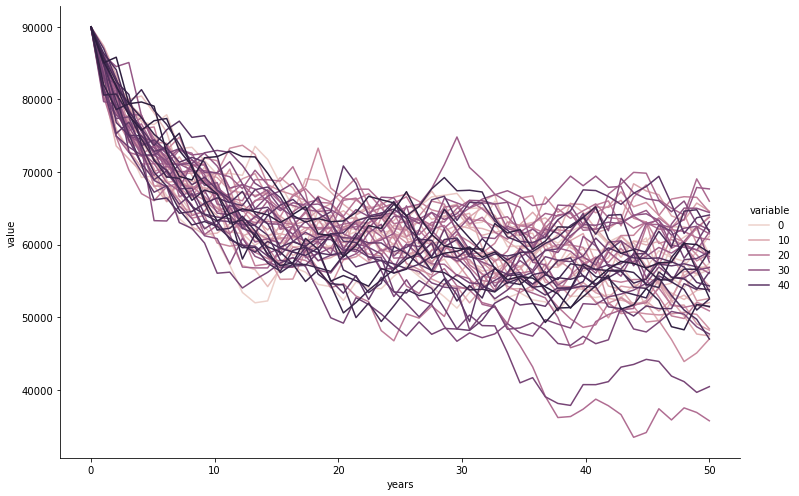

In [15]:
line = sns.relplot(
    data=df_melted,
    x='years',
    y='value',
    hue='variable',
    height=7,
    aspect=1.5,
    kind='line'
)